## GROUP 21
- Sai Phani Ram Popuri : **2205577**
- Sandeep Potla : **2151524**
- Sai Suma Podila : **2149229**
- Manivardhan Reddy Pidugu : **2146807**

In [3]:
#!pip install tensorflow

### Importing essential libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import models, datasets, layers, optimizers 

### Loading the dataset

In [3]:
from keras.datasets import fashion_mnist

### Splitting the dataset into training and test data

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(X_train_full.shape)

(60000, 28, 28)


In [6]:
print(type(X_train_full))

<class 'numpy.ndarray'>


In [7]:
# Note that the fashion_mnist is an image dataset with an image size of 28 pixel * 28 pixel
X_train_full[0].size

784

### Splitting the training data into training and validation sets.

In [8]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [9]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_valid: ',X_valid.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_valid: ',y_valid.shape)

Shape of X_train:  (50000, 28, 28)
Shape of X_valid:  (10000, 28, 28)
Shape of y_train:  (50000,)
Shape of y_valid:  (10000,)


### Visualizing the pixel values of the first image.

Image Encoded Label:  9


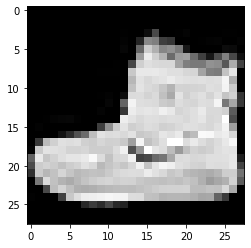

In [10]:
plt.imshow(X_train[0], cmap="gray")
print("Image Encoded Label: ", y_train[0])

- Note that the images in the dataset have been 'Label Encoded.'
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

### Plotting the first 25 images from the training data

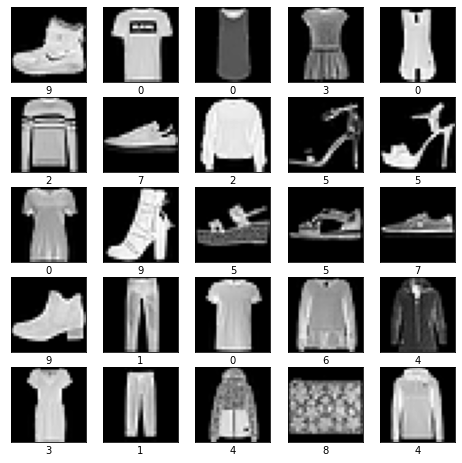

In [11]:
plt.figure(figsize=(8, 8))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.xlabel(y_train[i])
  plt.xticks([])
  plt.yticks([]);

### Scaling the input features in the Training, Validation, and Test sets.
- Since, the pixel intensities range from 0 to 255, we are implenting here the MIN-MAX Scaler.
- Min-max scaling (x) = (x - min) / (Max - min)
- Minimum value = 0
- Maximum value = 255

In [12]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [13]:
# Verifying the data after scaling. Values must range between [0, 1]
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### ANN with no hidden layer. Just the input and the output layers are in place.

- Below, we are configuring our Neural Network by defining the following:
    1. Activation function for the output layer: **Softmax** (To interpret our predictions as probabilities - Multiple classes)
    2. Loss Function in use: **Sparse Categorical Cross Entropy**
    3. Performance Metric: **Accuracy**

In [14]:
# Use a flatten input layer and output layer

ann1 = models.Sequential([
                        layers.Flatten(input_shape=(28, 28)),
                        layers.Dense(10, activation='softmax')])

ann1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

**Summary( )**
- summary( ) gives insights on the info about the weights for each individual layers (Input, Hidden, and Output)
- Below cell outputs the Parameters for the Input and the output layers.
- For eg:
    1. Each input neuron gets connected to every other output neuron.
    2. Each output neuron accommodates a bias term.
    3. Therefore, 784 * 10 + 10 (Bias) = 7850

In [15]:
ann1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Fitting the model

**Observations**
- When we train the model, we can notice at every epoch we can find 1563 total operations. The number 1563 has a significance:
     1. Tensorflow makes use of the mini-batch gradient descent in the back-end to train the model.
     2. The default batch size of the model is 32.
     3. In out X_train array, we have 50,000 records available.
     4. Implies, 50000/32 = 1563 (approx) batches.

In [16]:
ann1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.6217 - accuracy: 0.7899
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4697 - accuracy: 0.8400
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4424 - accuracy: 0.8491
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4271 - accuracy: 0.8535
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4170 - accuracy: 0.8563


In [17]:
info1 = ann1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4098 - accuracy: 0.8577 - val_loss: 0.4290 - val_accuracy: 0.8506
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4028 - accuracy: 0.8592 - val_loss: 0.4219 - val_accuracy: 0.8559
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3988 - accuracy: 0.8615 - val_loss: 0.4234 - val_accuracy: 0.8517
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3962 - accuracy: 0.8631 - val_loss: 0.4412 - val_accuracy: 0.8447
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3926 - accuracy: 0.8651 - val_loss: 0.4173 - val_accuracy: 0.8576
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3892 - accuracy: 0.8620 - val_loss: 0.4355 - val_accuracy: 0.8497
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3883 - accuracy: 0.8655 - val_loss: 0.4325 - val_accuracy:

### Learning Curves

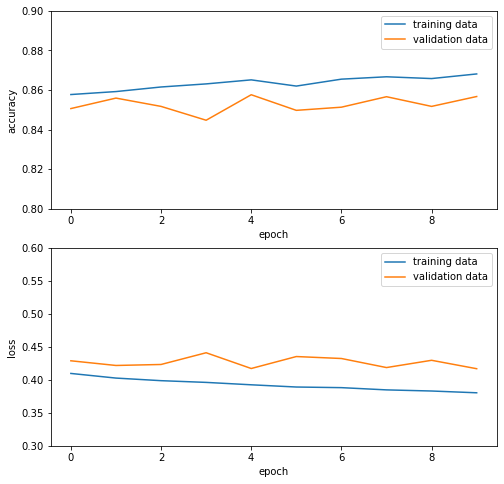

In [18]:
acc = info1.history['accuracy']
val_acc = info1.history['val_accuracy']

loss = info1.history['loss']
val_loss = info1.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.80,0.90])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.3,0.6])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

**Observations**
1. With the passage of epochs, the validation error decreased by a **miniscule** amount.
2. The training loss/ error has a clear decline from it's initial value of around 0.4.
3. The accuracy almost remained the same for the validation data.

### Evaluation with test data
    - The accuracy of the testing data comes up to be 84%.

In [19]:
ann1.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.8442


[0.44533729553222656, 0.8442000150680542]

In [20]:
y_pred = ann1.predict(X_test)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([2.5798235e-07, 2.2298101e-09, 7.5408593e-06, 5.1916859e-06,
       4.1055750e-06, 1.6245666e-01, 3.2127315e-05, 3.9465919e-02,
       5.2130101e-03, 7.9281515e-01], dtype=float32)

In [21]:
print('Predicted Value of the 1st element in test set: ', np.argmax(y_pred[0]))

Predicted Value of the 1st element in test set:  9


Actual value of the 1st element in test set:  9


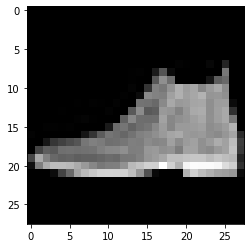

In [22]:
plt.imshow(X_test[0], cmap="gray")
print('Actual value of the 1st element in test set: ', y_test[0]);

In [23]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [24]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[769,   2,  14,  47,   7,   0, 144,   0,  17,   0],
       [  2, 959,   4,  22,   6,   0,   5,   0,   2,   0],
       [ 18,   5, 744,   9, 141,   1,  69,   0,  13,   0],
       [ 21,  15,  20, 839,  40,   0,  53,   1,  11,   0],
       [  0,   1, 105,  27, 794,   0,  64,   0,   9,   0],
       [  0,   0,   0,   1,   0, 931,   0,  39,   4,  25],
       [111,   1, 128,  29, 134,   0, 575,   0,  22,   0],
       [  0,   0,   0,   0,   0,  45,   0, 926,   0,  29],
       [  4,   1,   6,   7,   3,   4,  15,   4, 956,   0],
       [  0,   0,   0,   0,   0,  10,   1,  40,   0, 949]], dtype=int64)

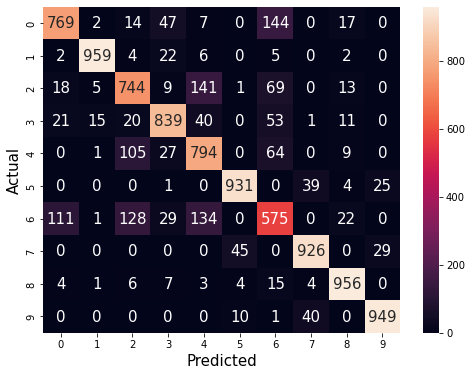

In [25]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.74      0.74      1000
           3       0.86      0.84      0.85      1000
           4       0.71      0.79      0.75      1000
           5       0.94      0.93      0.94      1000
           6       0.62      0.57      0.60      1000
           7       0.92      0.93      0.92      1000
           8       0.92      0.96      0.94      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### ANN with one hidden layer and 'ReLU' activation

In [27]:
# Use one hidden layer

ann2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Input Layer
    layers.Dense(128, activation='relu'), # Hidden Layer 1
    layers.Dense(10, activation='softmax')# Output Layer
])

ann2.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5188 - accuracy: 0.8186
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3857 - accuracy: 0.8624
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3468 - accuracy: 0.8739
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3223 - accuracy: 0.8816
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3033 - accuracy: 0.8897


In [28]:
ann2.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8761


[0.3461575210094452, 0.8761000037193298]

In [29]:
ann2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
info2 = ann2.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2890 - accuracy: 0.8939 - val_loss: 0.3281 - val_accuracy: 0.8825
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2748 - accuracy: 0.8995 - val_loss: 0.3613 - val_accuracy: 0.8699
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2658 - accuracy: 0.9021 - val_loss: 0.3298 - val_accuracy: 0.8835
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2519 - accuracy: 0.9077 - val_loss: 0.3300 - val_accuracy: 0.8813
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2453 - accuracy: 0.9085 - val_loss: 0.3172 - val_accuracy: 0.8871
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2352 - accuracy: 0.9118 - val_loss: 0.3232 - val_accuracy: 0.8880
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2282 - accuracy: 0.9154 - val_loss: 0.3596 - val_accuracy:

### Learning Curves

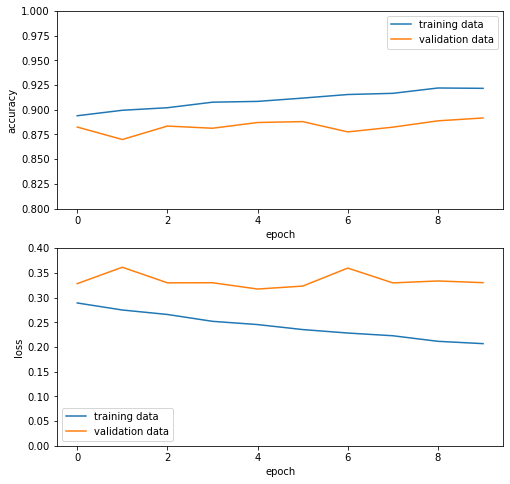

In [31]:
acc = info2.history['accuracy']
val_acc = info2.history['val_accuracy']

loss = info2.history['loss']
val_loss = info2.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.80,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0,0.4])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

**Observations**
1. Significant amount of loss has been observed in the training data with the passage of epochs.
2. The accuracy almost remained the same for the validation data from the start till end.

In [32]:
ann2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3568 - accuracy: 0.8844


[0.3568490445613861, 0.8844000101089478]

In [33]:
y_pred = ann2.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 0s 1ms/step


In [34]:
cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[884,   3,  23,  20,   3,   5,  56,   0,   6,   0],
       [  3, 977,   2,  15,   0,   0,   3,   0,   0,   0],
       [ 18,   1, 825,  16,  94,   0,  45,   0,   1,   0],
       [ 38,   8,  13, 889,  27,   2,  17,   0,   5,   1],
       [  0,   1,  96,  38, 821,   0,  40,   0,   4,   0],
       [  0,   0,   0,   1,   0, 958,   0,  29,   2,  10],
       [163,   3, 106,  30,  78,   1, 609,   0,  10,   0],
       [  0,   0,   0,   0,   0,   7,   0, 959,   0,  34],
       [  7,   0,   5,   4,   4,   1,   7,   6, 966,   0],
       [  0,   0,   0,   0,   0,   7,   1,  36,   0, 956]], dtype=int64)

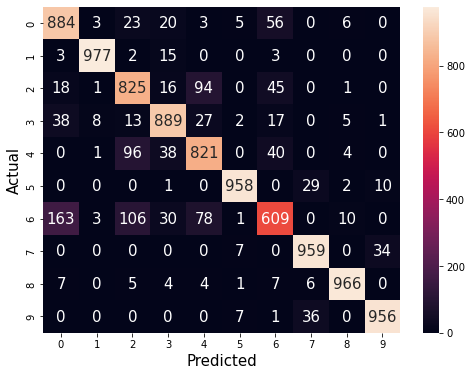

In [35]:
plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [36]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.77      0.82      0.80      1000
           3       0.88      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.78      0.61      0.69      1000
           7       0.93      0.96      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



**Observations**
1. With the addition of a hidden layer, the accuracy of the test set has been increased to 89% from 84% of the flattened Neural Network.

### ANN with dropout and batch normalization

In [38]:
# Use dropout and batch normalization

from keras.layers import Dropout, BatchNormalization

ann3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Input Layer
    
    layers.Dense(128, activation='relu'),  # Hidden Layer
    layers.BatchNormalization(),           # Batch Normalization
    
    layers.Dropout(0.2),              
    
    layers.Dense(10, activation='softmax') # Output Layer
])

ann3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann3.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5343 - accuracy: 0.8113
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4454 - accuracy: 0.8420
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4154 - accuracy: 0.8528
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3946 - accuracy: 0.8593
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3792 - accuracy: 0.8630


In [39]:
ann3.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 1ms/step - loss: 0.3732 - accuracy: 0.8636


[0.3731893002986908, 0.8636000156402588]

In [40]:
ann3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 102,282
Trainable params: 102,026
Non-trainable params: 256
______________________________________________

In [41]:
info3 = ann3.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3727 - accuracy: 0.8646 - val_loss: 0.3702 - val_accuracy: 0.8680
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3653 - accuracy: 0.8681 - val_loss: 0.3602 - val_accuracy: 0.8706
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3566 - accuracy: 0.8701 - val_loss: 0.3627 - val_accuracy: 0.8708
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3521 - accuracy: 0.8733 - val_loss: 0.3661 - val_accuracy: 0.8690
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3444 - accuracy: 0.8730 - val_loss: 0.3572 - val_accuracy: 0.8709
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3404 - accuracy: 0.8760 - val_loss: 0.3684 - val_accuracy: 0.8671
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3370 - accuracy: 0.8770 - val_loss: 0.3537 - val_accuracy:

### Learning Curves

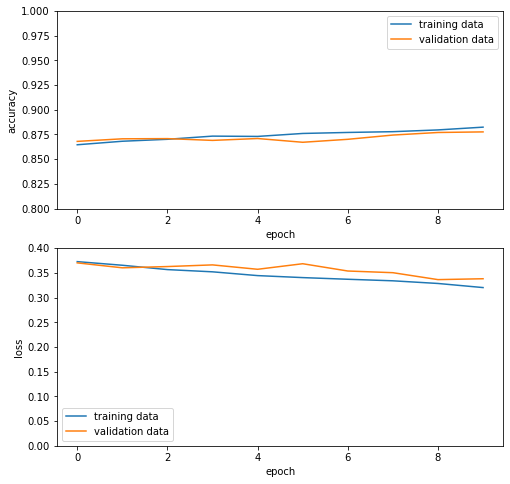

In [42]:
acc = info3.history['accuracy']
val_acc = info3.history['val_accuracy']

loss = info3.history['loss']
val_loss = info3.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.80,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0,0.4])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

**Observations**
- Of the three models so far, the validation loss performed the best when we apply batch normalization and dropout.

In [43]:
ann3.evaluate(X_test, y_test)

y_pred = ann2.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_test, y_pred_labels)
cm

313/313 [==============================] - 0s 1ms/step


array([[884,   3,  23,  20,   3,   5,  56,   0,   6,   0],
       [  3, 977,   2,  15,   0,   0,   3,   0,   0,   0],
       [ 18,   1, 825,  16,  94,   0,  45,   0,   1,   0],
       [ 38,   8,  13, 889,  27,   2,  17,   0,   5,   1],
       [  0,   1,  96,  38, 821,   0,  40,   0,   4,   0],
       [  0,   0,   0,   1,   0, 958,   0,  29,   2,  10],
       [163,   3, 106,  30,  78,   1, 609,   0,  10,   0],
       [  0,   0,   0,   0,   0,   7,   0, 959,   0,  34],
       [  7,   0,   5,   4,   4,   1,   7,   6, 966,   0],
       [  0,   0,   0,   0,   0,   7,   1,  36,   0, 956]], dtype=int64)

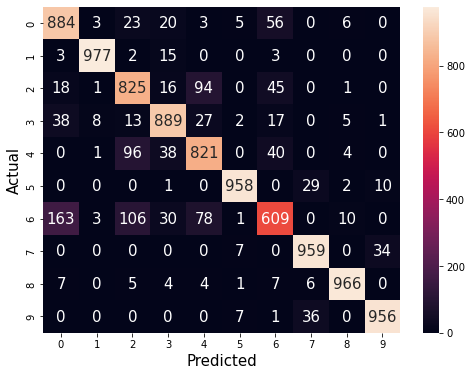

In [44]:
plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [45]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.77      0.82      0.80      1000
           3       0.88      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.78      0.61      0.69      1000
           7       0.93      0.96      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### ANN with One Hidden Layer and tanh activation for the hidden layer

In [46]:
# Use one hidden layer and tanh activation function

ann4 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Input Layer
    layers.Dense(128, activation='tanh'), # Hidden Layer
    layers.Dense(10, activation='softmax')# Output Layer
])

ann4.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [47]:
X_train.shape

(50000, 28, 28)

In [48]:
y_train.shape

(50000,)

In [49]:
ann4.fit(X_train, y_train)
ann4.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8517


[0.4054640233516693, 0.8517000079154968]

In [50]:
ann4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [51]:
info4 = ann4.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3751 - accuracy: 0.8642 - val_loss: 0.3780 - val_accuracy: 0.8597
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3401 - accuracy: 0.8758 - val_loss: 0.3543 - val_accuracy: 0.8715
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3133 - accuracy: 0.8846 - val_loss: 0.3417 - val_accuracy: 0.8777
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2965 - accuracy: 0.8905 - val_loss: 0.3410 - val_accuracy: 0.8737
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2810 - accuracy: 0.8963 - val_loss: 0.3295 - val_accuracy: 0.8781
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2695 - accuracy: 0.8994 - val_loss: 0.3162 - val_accuracy: 0.8849
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9029 - val_loss: 0.3240 - val_accuracy:

### Learning Curves

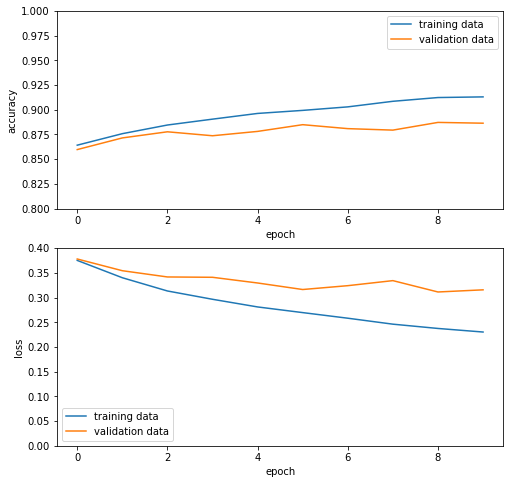

In [52]:
acc = info4.history['accuracy']
val_acc = info4.history['val_accuracy']

loss = info4.history['loss']
val_loss = info4.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.80,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0,0.4])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [53]:
ann4.evaluate(X_test, y_test)

y_pred = ann4.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_test, y_pred_labels)
cm

313/313 [==============================] - 0s 1ms/step


array([[849,   4,  15,  13,   7,   1, 101,   0,  10,   0],
       [  3, 975,   0,  14,   2,   0,   5,   0,   1,   0],
       [ 18,   1, 748,   9, 106,   0, 117,   0,   1,   0],
       [ 26,  16,  16, 847,  66,   1,  24,   0,   4,   0],
       [  0,   1,  81,  10, 810,   0,  94,   0,   4,   0],
       [  0,   0,   0,   1,   0, 962,   0,  18,   2,  17],
       [135,   1,  55,  25,  55,   0, 716,   0,  13,   0],
       [  0,   0,   0,   0,   0,  25,   0, 946,   0,  29],
       [  3,   0,   1,   4,   5,   2,   2,   5, 978,   0],
       [  0,   0,   0,   0,   0,  12,   1,  28,   0, 959]], dtype=int64)

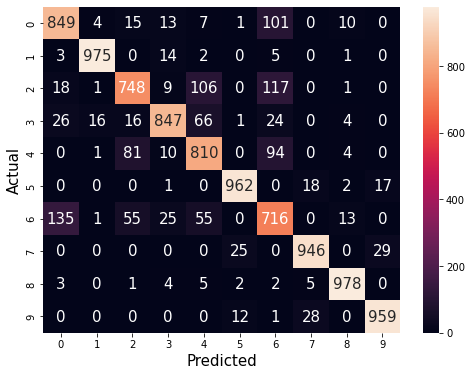

In [54]:
plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [55]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.82      0.75      0.78      1000
           3       0.92      0.85      0.88      1000
           4       0.77      0.81      0.79      1000
           5       0.96      0.96      0.96      1000
           6       0.68      0.72      0.70      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### ANN with two hidden layers with tanh, ReLU activations

In [56]:
# Use two hidden layers and different activation functions

ann5 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Input Layer
    layers.Dense(128, activation='tanh'),  # Hidden Layer 1
    layers.Dense(128, activation='relu'),  # Hidden Layer 2
    layers.Dense(10, activation='softmax') # Output Layer
])

ann5.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [57]:
ann5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [58]:
ann5.fit(X_train, y_train)

1563/1563 [==============================] - 3s 2ms/step - loss: 0.4857 - accuracy: 0.8222


In [59]:
ann5.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8458


[0.4271283745765686, 0.84579998254776]

In [60]:
info5 = ann5.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3680 - accuracy: 0.8651 - val_loss: 0.3669 - val_accuracy: 0.8630
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3309 - accuracy: 0.8760 - val_loss: 0.3462 - val_accuracy: 0.8709
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3074 - accuracy: 0.8848 - val_loss: 0.3400 - val_accuracy: 0.8751
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2899 - accuracy: 0.8923 - val_loss: 0.3556 - val_accuracy: 0.8719
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2769 - accuracy: 0.8949 - val_loss: 0.3258 - val_accuracy: 0.8799
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.9000 - val_loss: 0.3365 - val_accuracy: 0.8770
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2537 - accuracy: 0.9046 - val_loss: 0.3345 - val_accuracy:

### Learning Curves

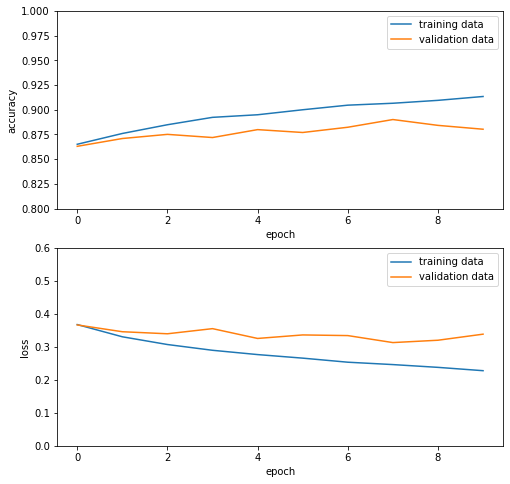

In [61]:
acc = info5.history['accuracy']
val_acc = info5.history['val_accuracy']

loss = info5.history['loss']
val_loss = info5.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.80,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0,0.6])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [62]:
y_pred = ann5.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_test, y_pred_labels)
cm

313/313 [==============================] - 0s 979us/step


array([[883,   2,   7,  13,   0,   1,  88,   0,   6,   0],
       [  6, 971,   1,  19,   0,   0,   2,   0,   1,   0],
       [ 22,   2, 878,  12,  32,   0,  53,   0,   1,   0],
       [ 49,  11,   9, 884,  19,   0,  26,   0,   2,   0],
       [  2,   0, 198,  49, 660,   0,  88,   0,   3,   0],
       [  0,   0,   0,   1,   0, 971,   0,  14,   1,  13],
       [145,   0, 102,  18,  34,   0, 691,   0,  10,   0],
       [  0,   0,   0,   0,   0,  19,   0, 945,   1,  35],
       [  5,   0,   6,   3,   0,   4,  13,   3, 966,   0],
       [  0,   0,   0,   0,   0,   8,   1,  34,   0, 957]], dtype=int64)

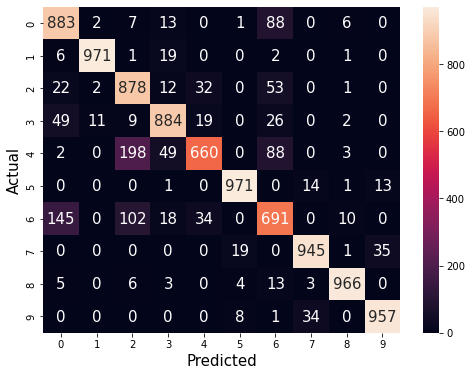

In [63]:
plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [64]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.73      0.88      0.80      1000
           3       0.88      0.88      0.88      1000
           4       0.89      0.66      0.76      1000
           5       0.97      0.97      0.97      1000
           6       0.72      0.69      0.70      1000
           7       0.95      0.94      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### ANN with two hidden units (ReLU activation function) and Batch Normalization

In [65]:
ann6 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'), # Hidden Layer 1
    layers.Dense(128, activation='relu'), # Hidden Layer 2
    layers.BatchNormalization(),          # Batch Normalization
    layers.Dense(10, activation='softmax')# Output Layer
])

ann6.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [66]:
ann6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,794
Trainable params: 118,538
Non-trainable params: 256
______________________________________________

In [67]:
ann6.fit(X_train, y_train)

1563/1563 [==============================] - 4s 2ms/step - loss: 0.5024 - accuracy: 0.8202


In [68]:
ann6.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 1ms/step - loss: 0.4282 - accuracy: 0.8466


[0.4281783103942871, 0.8465999960899353]

In [69]:
info6 = ann6.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3933 - accuracy: 0.8580 - val_loss: 0.4051 - val_accuracy: 0.8557
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3555 - accuracy: 0.8713 - val_loss: 0.3596 - val_accuracy: 0.8704
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3362 - accuracy: 0.8772 - val_loss: 0.4300 - val_accuracy: 0.8490
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3198 - accuracy: 0.8823 - val_loss: 0.3511 - val_accuracy: 0.8745
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3059 - accuracy: 0.8877 - val_loss: 0.3426 - val_accuracy: 0.8777
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2914 - accuracy: 0.8924 - val_loss: 0.3431 - val_accuracy: 0.8769
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2796 - accuracy: 0.8961 - val_loss: 0.3815 - val_accuracy:

### Learning Curves

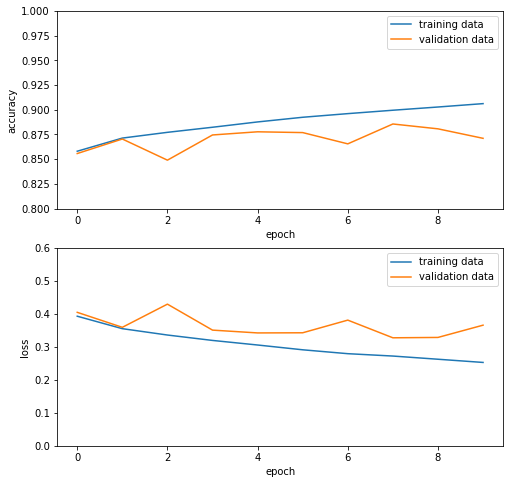

In [70]:
acc = info6.history['accuracy']
val_acc = info6.history['val_accuracy']

loss = info6.history['loss']
val_loss = info6.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.80,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0,0.6])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [71]:
y_pred = ann6.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_test, y_pred_labels)
cm

313/313 [==============================] - 0s 1ms/step


array([[908,   2,  13,  11,   0,   0,  62,   0,   4,   0],
       [  8, 969,   0,  17,   1,   0,   4,   0,   1,   0],
       [ 24,   5, 858,  16,  42,   0,  55,   0,   0,   0],
       [ 62,  10,  10, 893,   5,   0,  18,   0,   2,   0],
       [  6,   2, 166,  76, 662,   0,  88,   0,   0,   0],
       [  0,   0,   0,   1,   0, 948,   0,  26,   2,  23],
       [185,   1, 114,  25,  33,   0, 640,   0,   2,   0],
       [  0,   0,   0,   0,   0,  14,   0, 969,   0,  17],
       [ 10,   1,  11,   8,   1,   3,  18,   5, 943,   0],
       [  0,   0,   0,   0,   0,   6,   1,  73,   0, 920]], dtype=int64)

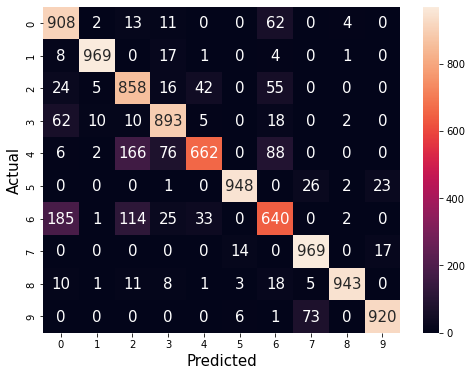

In [72]:
plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [73]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1000
           1       0.98      0.97      0.97      1000
           2       0.73      0.86      0.79      1000
           3       0.85      0.89      0.87      1000
           4       0.89      0.66      0.76      1000
           5       0.98      0.95      0.96      1000
           6       0.72      0.64      0.68      1000
           7       0.90      0.97      0.93      1000
           8       0.99      0.94      0.97      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



### ANN with 3 hidden layers and batch normalization

In [74]:
ann7 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Input Layer
    layers.Dense(128, activation='relu'), # Hidden Layer 1
    layers.Dense(128, activation='relu'), # Hidden Layer 2
    layers.Dense(128, activation='relu'), # Hidden Layer 3
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')# Output Layer
])

ann7.compile(optimizer='sgd', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [75]:
ann7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               100480    
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                      

In [76]:
ann7.fit(X_train, y_train)

1563/1563 [==============================] - 3s 2ms/step - loss: 0.5527 - accuracy: 0.8088


In [77]:
ann7.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 1ms/step - loss: 0.4559 - accuracy: 0.8327


[0.455916166305542, 0.8327000141143799]

In [78]:
info7 = ann7.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4188 - accuracy: 0.8508 - val_loss: 0.4260 - val_accuracy: 0.8479
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3791 - accuracy: 0.8647 - val_loss: 0.4154 - val_accuracy: 0.8551
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3549 - accuracy: 0.8720 - val_loss: 0.3819 - val_accuracy: 0.8593
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3365 - accuracy: 0.8763 - val_loss: 0.3491 - val_accuracy: 0.8717
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3210 - accuracy: 0.8821 - val_loss: 0.3855 - val_accuracy: 0.8549
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3077 - accuracy: 0.8874 - val_loss: 0.3435 - val_accuracy: 0.8745
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.8922 - val_loss: 0.3755 - val_accuracy:

### Learning Curves

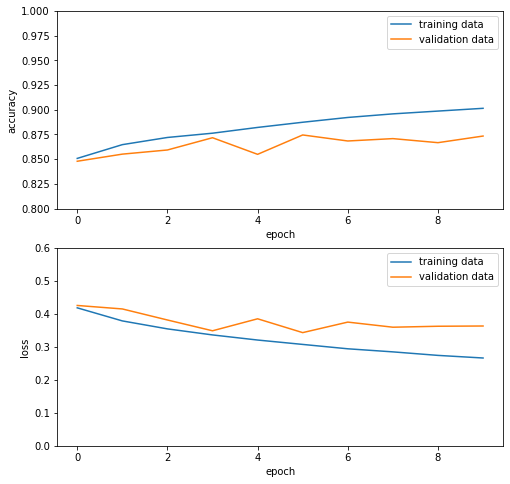

In [79]:
acc = info7.history['accuracy']
val_acc = info7.history['val_accuracy']

loss = info7.history['loss']
val_loss = info7.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.80,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0,0.6])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [80]:
y_pred = ann7.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_test, y_pred_labels)
cm

313/313 [==============================] - 0s 1ms/step


array([[757,   3,  20,  64,  10,   1, 127,   0,  17,   1],
       [  0, 965,   1,  26,   4,   0,   2,   0,   2,   0],
       [  8,   0, 654,  15, 237,   0,  82,   1,   2,   1],
       [  9,   9,   6, 902,  50,   0,  19,   0,   5,   0],
       [  0,   2,  35,  24, 909,   0,  26,   0,   4,   0],
       [  0,   0,   0,   1,   0, 937,   0,  42,   2,  18],
       [ 81,   2,  49,  49, 166,   0, 637,   0,  16,   0],
       [  0,   0,   0,   0,   0,   6,   0, 976,   1,  17],
       [  2,   0,   3,   5,   8,   1,   8,   4, 969,   0],
       [  0,   0,   0,   1,   0,   7,   1,  52,   0, 939]], dtype=int64)

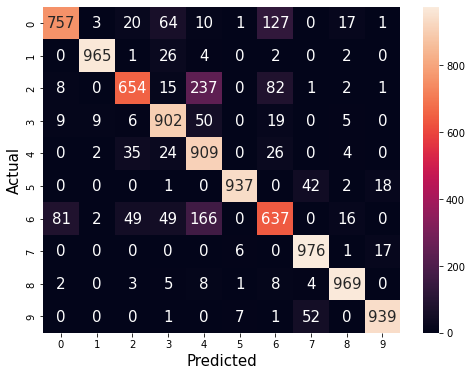

In [81]:
plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [82]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.85      0.65      0.74      1000
           3       0.83      0.90      0.86      1000
           4       0.66      0.91      0.76      1000
           5       0.98      0.94      0.96      1000
           6       0.71      0.64      0.67      1000
           7       0.91      0.98      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



### ANN with two hidden layers and different neuron units with Adagrad

In [83]:
ann8 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Input Layer
    layers.Dense(128, activation='relu'), # Hidden Layer 1
    layers.Dense(64, activation='relu'),  # Hidden Layer 2
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')# Output Layer
])

ann8.compile(optimizer='Adagrad', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [84]:
ann8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,642
Trainable params: 109,514
Non-trainable params: 128
______________________________________________

In [85]:
ann8.fit(X_train, y_train)

1563/1563 [==============================] - 3s 2ms/step - loss: 0.8012 - accuracy: 0.7470


In [86]:
ann8.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 1ms/step - loss: 0.6212 - accuracy: 0.8010


[0.6212077140808105, 0.8009999990463257]

In [87]:
info8 = ann8.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5963 - accuracy: 0.8108 - val_loss: 0.5543 - val_accuracy: 0.8164
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5444 - accuracy: 0.8241 - val_loss: 0.5166 - val_accuracy: 0.8259
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5145 - accuracy: 0.8309 - val_loss: 0.4967 - val_accuracy: 0.8325
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4910 - accuracy: 0.8394 - val_loss: 0.4791 - val_accuracy: 0.8364
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4749 - accuracy: 0.8433 - val_loss: 0.4679 - val_accuracy: 0.8408
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4610 - accuracy: 0.8464 - val_loss: 0.4573 - val_accuracy: 0.8427
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4527 - accuracy: 0.8491 - val_loss: 0.4481 - val_accuracy:

### Learning Curves

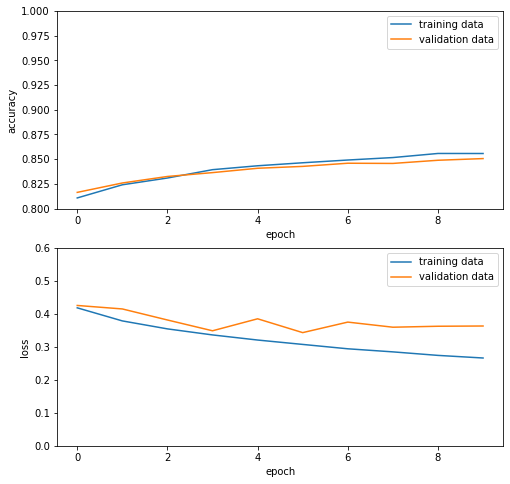

In [88]:
acc = info8.history['accuracy']
val_acc = info8.history['val_accuracy']

loss = info8.history['loss']
val_loss = info8.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.80,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0,0.6])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [89]:
y_pred = ann8.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_test, y_pred_labels)
cm

313/313 [==============================] - 0s 1ms/step


array([[817,   1,  14,  44,   5,   2, 102,   2,  13,   0],
       [  3, 956,   6,  24,   7,   1,   2,   0,   1,   0],
       [ 19,   1, 763,   9, 134,   3,  62,   0,   9,   0],
       [ 33,   8,  14, 858,  36,   1,  45,   0,   5,   0],
       [  1,   0, 117,  29, 766,   2,  80,   0,   5,   0],
       [  1,   0,   0,   0,   0, 931,   0,  45,   2,  21],
       [158,   2, 127,  23, 101,   1, 563,   0,  25,   0],
       [  0,   0,   0,   0,   0,  28,   0, 939,   2,  31],
       [  2,   2,   8,   8,   6,   5,  11,   5, 953,   0],
       [  0,   0,   0,   1,   0,  15,   0,  43,   1, 940]], dtype=int64)

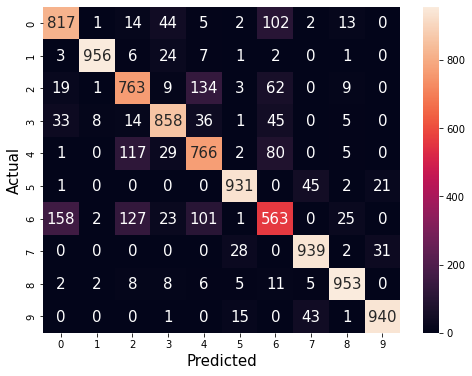

In [90]:
plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [91]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.99      0.96      0.97      1000
           2       0.73      0.76      0.74      1000
           3       0.86      0.86      0.86      1000
           4       0.73      0.77      0.75      1000
           5       0.94      0.93      0.94      1000
           6       0.65      0.56      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.94      0.95      0.95      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### ANN with 'ReLu' activation function and 'Stochastic Gradient Descent' Optimizer.

In [92]:
ann9 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Input Layer
    layers.Dense(128, activation='relu'), # Hidden Layer 1
    layers.BatchNormalization(), 
    layers.Dense(10, activation='softmax')# Output Layer
])

ann9.compile(optimizer='SGD', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [93]:
ann9.fit(X_train, y_train, batch_size=50)

1000/1000 [==============================] - 2s 2ms/step - loss: 0.6023 - accuracy: 0.7954


In [94]:
ann9.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 1ms/step - loss: 0.4809 - accuracy: 0.8295


[0.480898380279541, 0.8295000195503235]

In [95]:
info9 = ann9.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4548 - accuracy: 0.8423 - val_loss: 0.4293 - val_accuracy: 0.8418
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4057 - accuracy: 0.8568 - val_loss: 0.3950 - val_accuracy: 0.8567
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3761 - accuracy: 0.8667 - val_loss: 0.3968 - val_accuracy: 0.8587
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3561 - accuracy: 0.8733 - val_loss: 0.3897 - val_accuracy: 0.8577
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3404 - accuracy: 0.8780 - val_loss: 0.3719 - val_accuracy: 0.8658
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3286 - accuracy: 0.8824 - val_loss: 0.3576 - val_accuracy: 0.8689
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.8858 - val_loss: 0.3590 - val_accuracy:

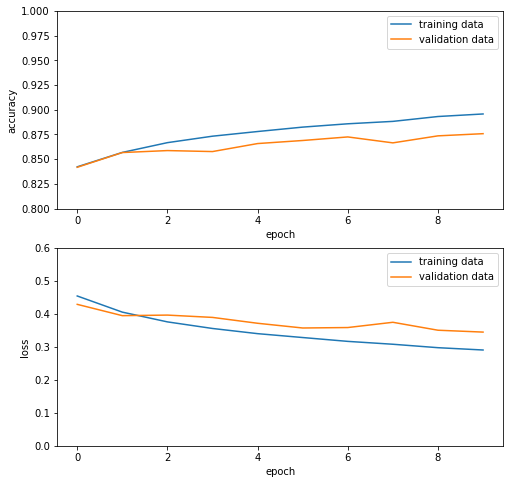

In [96]:
acc = info9.history['accuracy']
val_acc = info9.history['val_accuracy']

loss = info9.history['loss']
val_loss = info9.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.80,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0,0.6])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [97]:
y_pred = ann9.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_test, y_pred_labels)
cm

313/313 [==============================] - 0s 1ms/step


array([[826,   3,  23,  20,   9,   3, 107,   0,   9,   0],
       [  3, 973,   0,  17,   2,   0,   3,   0,   2,   0],
       [ 19,   2, 761,   5, 152,   1,  56,   0,   3,   1],
       [ 25,  13,  22, 839,  50,   1,  45,   0,   5,   0],
       [  2,   2,  66,  17, 850,   0,  58,   1,   4,   0],
       [  0,   0,   0,   1,   0, 957,   0,  26,   3,  13],
       [136,   2, 104,  15,  94,   0, 634,   0,  15,   0],
       [  0,   0,   0,   0,   0,  26,   0, 953,   0,  21],
       [  6,   0,   6,   3,   6,   1,   8,   7, 963,   0],
       [  0,   0,   0,   0,   0,   8,   1,  47,   0, 944]], dtype=int64)

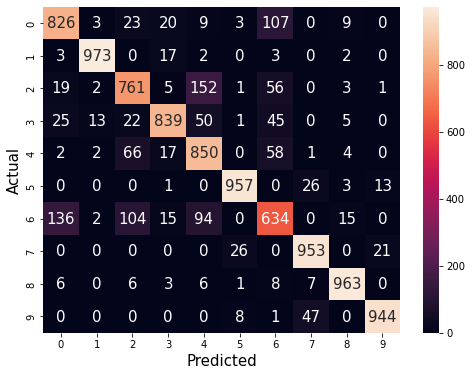

In [98]:
plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [101]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.77      0.76      0.77      1000
           3       0.91      0.84      0.88      1000
           4       0.73      0.85      0.79      1000
           5       0.96      0.96      0.96      1000
           6       0.70      0.63      0.66      1000
           7       0.92      0.95      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



### L1 and L2 Regression Based model

In [104]:
# l1, l2: Lasso and Ridge Regression

from keras.regularizers import l2
from keras.regularizers import l1_l2
ann_l1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer='l1'),
    layers.Dense(10, activation='softmax')
])

ann_l1.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann_l1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 2.4517 - accuracy: 0.7024
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2641 - accuracy: 0.7492
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1778 - accuracy: 0.7601
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1390 - accuracy: 0.7665
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1131 - accuracy: 0.7687


In [105]:
ann_l1.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 1.0888 - accuracy: 0.7695


[1.0888080596923828, 0.7695000171661377]

In [106]:
info_l1 = ann_l1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0842 - accuracy: 0.7740 - val_loss: 1.0803 - val_accuracy: 0.7637
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0747 - accuracy: 0.7754 - val_loss: 1.0748 - val_accuracy: 0.7721
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0606 - accuracy: 0.7774 - val_loss: 1.0400 - val_accuracy: 0.7822
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0603 - accuracy: 0.7765 - val_loss: 1.0198 - val_accuracy: 0.7841
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0467 - accuracy: 0.7781 - val_loss: 1.0992 - val_accuracy: 0.7536
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0438 - accuracy: 0.7780 - val_loss: 1.0193 - val_accuracy: 0.7861
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0318 - accuracy: 0.7799 - val_loss: 1.0083 - val_accuracy:

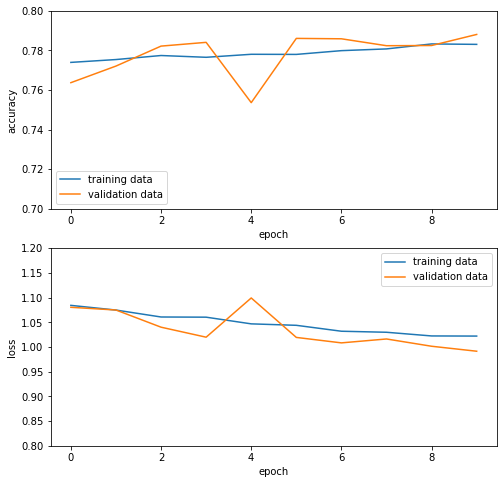

In [111]:
acc = info_l1.history['accuracy']
val_acc = info_l1.history['val_accuracy']

loss = info_l1.history['loss']
val_loss = info_l1.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.7 ,0.8])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.8, 1.2])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [112]:
y_pred = ann_l1.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_test, y_pred_labels)
cm

313/313 [==============================] - 1s 2ms/step


array([[749,   9,   9,  87,  17,   6,  98,   0,  25,   0],
       [  2, 933,  12,  41,   7,   0,   3,   1,   1,   0],
       [ 26,   4, 587,  10, 250,   2, 109,   0,  12,   0],
       [ 47,  10,   8, 843,  53,   1,  31,   0,   6,   1],
       [  1,   2,  77,  36, 804,   3,  69,   0,   8,   0],
       [  0,   0,   0,   1,   0, 855,   0,  53,  26,  65],
       [170,   2, 116,  60, 238,   9, 361,   0,  44,   0],
       [  0,   0,   0,   0,   0,  80,   0, 818,   6,  96],
       [  2,   1,  13,  10,   5,  14,  15,   4, 935,   1],
       [  0,   0,   0,   1,   1,  31,   0,  33,   2, 932]], dtype=int64)

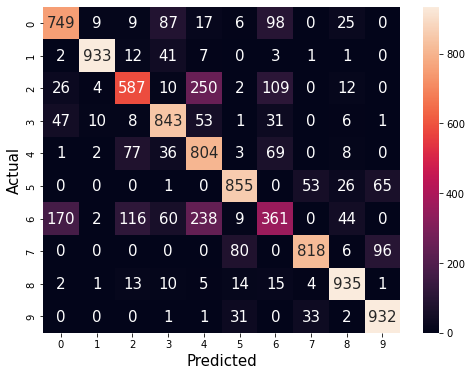

In [113]:
plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [114]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.97      0.93      0.95      1000
           2       0.71      0.59      0.64      1000
           3       0.77      0.84      0.81      1000
           4       0.58      0.80      0.68      1000
           5       0.85      0.85      0.85      1000
           6       0.53      0.36      0.43      1000
           7       0.90      0.82      0.86      1000
           8       0.88      0.94      0.91      1000
           9       0.85      0.93      0.89      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



**REMARKS**

- The below table highlights the accuracy obtained via multiple models.

| Model in Use | Accuracy (%)|
| --- | --- |
| No hidden layer |  84 |
| One Hidden Layer and ReLU activation | 88  |
| One Hidden Layer with dropout and batch normalization | 88  |
| One Hidden Layer and tanh activation |  88 |
| Two Hidden Layers with tanh and ReLU activations |  87 |
| Two Hidden Layers with batch normalization |  88 |
| Three Hidden Layers with batch normalization |  86 |
| Two Hidden Layers with different neural units |  85 |
| One Hidden Layer and Stochastic Gradient Descent (SGD) | 87  |
| One hidden Layer with 'l1' regularization|  78 |

- Out of the above described models, the best accuracy of 88 % has been observed when using 
    1. One Hidden Layer and ReLU activation
    2. One Hidden Layer with dropout and batch normalization
    3. One Hidden Layer and tanh activation
    4. Two Hidden Layers with batch normalization
    
**Comments on Regularization**
    - Though regularization helps to reduce the overfitting and delivers better accuracy, In our case the l1 regularization has little effect in improving the performance.